# Correlation between (log) protein synthesis and (log) mRNA abundance

According to https://www.ncbi.nlm.nih.gov/pubmed/28365149:

>The overall correlation between mRNA and protein abundances across all conditions was low (0.46), but for differentially expressed proteins (n = 202), the median mRNA-protein correlation was 0.88.

Their Fig. 2A shows $R^2 = 0.45$.

We can only do synthesis rates.

#### Protein synthesis rates:

In [75]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["Consolas"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

from statsmodels.nonparametric.smoothers_lowess import lowess

### Synthesis rates

In [4]:
synthrates = pkl.load(open("../../parameters/prot_speeds.p"))

In [6]:
pd.Series(synthrates).describe()

count    4475.000000
mean        1.349305
std         7.847669
min         0.001149
25%         0.049425
50%         0.122989
75%         0.379763
max       193.922989
dtype: float64

In [12]:
pd.Series(synthrates).sum() * 3600

21737298.352131646

Interesting. So here we get 21.7 M proteins per hour

### Transcriptome

In [73]:
transcriptome = pkl.load(open('../../parameters/transcriptome_plotkin.p'))

In [74]:
sum(transcriptome.values())

60000

In [76]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, markersize=20,
                  alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png"):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure(figsize=figsize)                

    ax = fig.add_subplot(111)
    #ax.set_rasterization_zorder(1)
    
    ax.grid(True, linestyle = '-', color = '0.75')
    ax.set_xscale('log')
    ax.set_yscale('log')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    scat = plt.scatter(xs, ys,
                       #c=plt.rcParams['axes.color_cycle'][0], 
                       c=myfacecolor, 
                       #edgecolor=plt.rcParams['patch.edgecolor'],
                       edgecolor=myedgecolor,
                       s=markersize, zorder=0)
    scat.set_alpha(alpha)
    #scat.set_color()
    #scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
    # , color=, edgecolor=

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points][:-2]  # modify to remove outliers 
    new_ys = [point[1] for point in sorted_points][:-2]  # modify to remove outliers
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, plt.rcParams['axes.color_cycle'][1], linewidth=4)

    ax.set_rasterization_zorder(1)

    plt.savefig(filename, bbox_inches='tight', dpi=200)

In [78]:
log_synthrates = {gene: np.log(synthrates[gene]) for gene in synthrates if synthrates[gene] > 0}

In [79]:
log_transcriptome = {gene: np.log(transcriptome[gene]) for gene in transcriptome if transcriptome[gene] > 0}

In [81]:
myedgecolor = 'powderblue'
myfacecolor = 'steelblue'

In [83]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['patch.edgecolor'] = 'powderblue'
plt.rcParams["patch.force_edgecolor"] = True  # required
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'
plt.rcParams['axes.color_cycle'] = ['steelblue', 'darkred', 'darkgreen']

/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


4475


/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


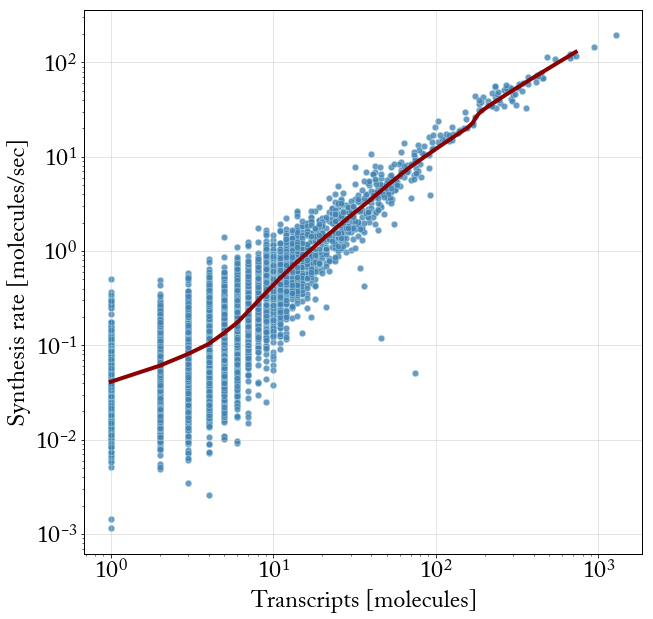

In [94]:
scatter_dicts(transcriptome, synthrates, xaxislabel='Transcripts [molecules]', 
              yaxislabel='Synthesis rate [molecules/sec]', fontsize=24, markersize=40,
              alpha=0.8, filename='transcriptome_vs_modelled_synthesis_rates.pgf')

In [95]:
prot_per_transcript_speeds = pkl.load(open('../../parameters/prot_per_transcript_speeds.p'))

4475


/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


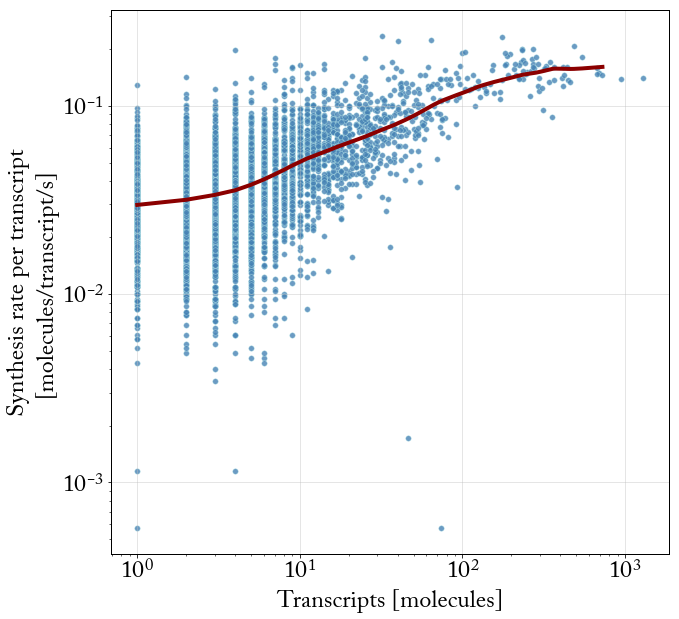

In [96]:
scatter_dicts(transcriptome, prot_per_transcript_speeds, xaxislabel='Transcripts [molecules]', 
              yaxislabel='Synthesis rate per transcript\n[molecules/transcript/s]', fontsize=24, markersize=30,
              alpha=0.8, rasterized=True, filename="co-translational_amplification.pgf")

/home/martin/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/home/martin/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


4475
4475


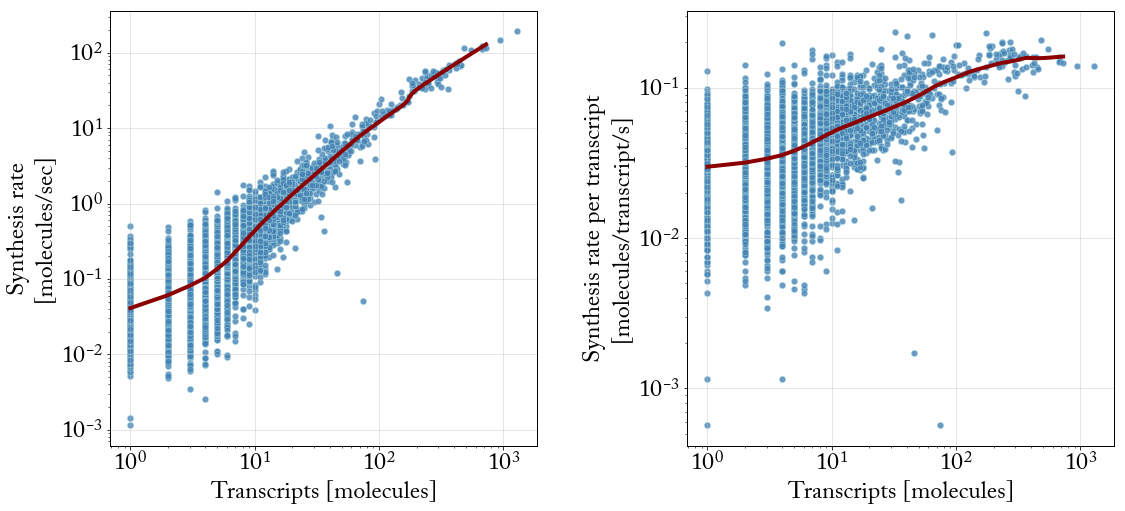

In [109]:
fontsize=24
markersize=40
alpha=0.8
    
plt.rcParams['figure.figsize'] = (18, 8)

fig = plt.figure()
fig.subplots_adjust(wspace=0.35)
#################################################################################################
ax = fig.add_subplot(121, axisbg='white')

dict1 = transcriptome
dict2 = synthrates
xaxislabel='Transcripts [molecules]'
yaxislabel='Synthesis rate\n[molecules/sec]'

plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
print len(plotkeys)
xs = [dict1[key] for key in plotkeys]
ys = [dict2[key] for key in plotkeys] 

#fig =  plt.figure(figsize=figsize)                

#ax = fig.add_subplot(111)
#ax.set_rasterization_zorder(1)

ax.grid(True, linestyle = '-', color = '0.75')
ax.set_xscale('log')
ax.set_yscale('log')
if xaxislabel:
    ax.set_xlabel(xaxislabel)
    if fontsize:
        ax.set_xlabel(xaxislabel, fontsize=fontsize)
        plt.setp(ax.get_xticklabels(), fontsize=fontsize)
if yaxislabel:
    ax.set_ylabel(yaxislabel)
    if fontsize:
        ax.set_ylabel(yaxislabel, fontsize=fontsize)
        plt.setp(ax.get_yticklabels(), fontsize=fontsize)

scat = plt.scatter(xs, ys,
                   #c=plt.rcParams['axes.color_cycle'][0], 
                   c=myfacecolor, 
                   #edgecolor=plt.rcParams['patch.edgecolor'],
                   edgecolor=myedgecolor,
                   s=markersize, zorder=0)
scat.set_alpha(alpha)
#scat.set_color()
#scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
# , color=, edgecolor=

points = zip(xs, ys)
sorted_points = sorted(points)
new_xs = [point[0] for point in sorted_points][:-2]  # modify to remove outliers 
new_ys = [point[1] for point in sorted_points][:-2]  # modify to remove outliers
ylowess = lowess(new_ys, new_xs)[:,1]
plt.plot(new_xs, ylowess, plt.rcParams['axes.color_cycle'][1], linewidth=4)

ax.set_rasterization_zorder(1)
#################################################################################################
ax = fig.add_subplot(122, axisbg='white')

dict1 = transcriptome
dict2 = prot_per_transcript_speeds
xaxislabel='Transcripts [molecules]'
yaxislabel='Synthesis rate per transcript\n[molecules/transcript/s]'

plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
print len(plotkeys)
xs = [dict1[key] for key in plotkeys]
ys = [dict2[key] for key in plotkeys] 

#fig =  plt.figure(figsize=figsize)                

#ax = fig.add_subplot(111)
#ax.set_rasterization_zorder(1)

ax.grid(True, linestyle = '-', color = '0.75')
ax.set_xscale('log')
ax.set_yscale('log')
if xaxislabel:
    ax.set_xlabel(xaxislabel)
    if fontsize:
        ax.set_xlabel(xaxislabel, fontsize=fontsize)
        plt.setp(ax.get_xticklabels(), fontsize=fontsize)
if yaxislabel:
    ax.set_ylabel(yaxislabel)
    if fontsize:
        ax.set_ylabel(yaxislabel, fontsize=fontsize)
        plt.setp(ax.get_yticklabels(), fontsize=fontsize)

scat = plt.scatter(xs, ys,
                   #c=plt.rcParams['axes.color_cycle'][0], 
                   c=myfacecolor, 
                   #edgecolor=plt.rcParams['patch.edgecolor'],
                   edgecolor=myedgecolor,
                   s=markersize, zorder=0)
scat.set_alpha(alpha)
#scat.set_color()
#scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
# , color=, edgecolor=

points = zip(xs, ys)
sorted_points = sorted(points)
new_xs = [point[0] for point in sorted_points][:-2]  # modify to remove outliers 
new_ys = [point[1] for point in sorted_points][:-2]  # modify to remove outliers
ylowess = lowess(new_ys, new_xs)[:,1]
plt.plot(new_xs, ylowess, plt.rcParams['axes.color_cycle'][1], linewidth=4)

ax.set_rasterization_zorder(1)

plt.savefig('co-translational_amplification.pgf', bbox_inches='tight', dpi=200)

Linear correlation of logs:

https://stackoverflow.com/questions/16701674/calculate-the-correlation-of-dictionaries-based-on-their-values-in-python

In [89]:
keys = list(log_transcriptome.viewkeys() | log_synthrates.viewkeys())

np.corrcoef([log_transcriptome.get(x, 0) for x in keys], [log_synthrates.get(x, 0) for x in keys]) #[0, 1]

array([[1.        , 0.72282851],
       [0.72282851, 1.        ]])

### Exkurs: compare with 11 M estimate

#### On average transcriptome:

In [21]:
init_rates_plotkin = pkl.load(open('../../parameters/init_rates_plotkin.p'))

In [22]:
pd.Series(init_rates_plotkin).describe()

count    4.839000e+03
mean     1.567727e-06
std      1.128263e-06
min      9.375766e-10
25%      8.320521e-07
50%      1.291872e-06
75%      1.962904e-06
max      1.440641e-05
dtype: float64

Sum of init rates weighted by transcript abundance:

In [33]:
initations_per_second = {gene: init_rates_plotkin[gene] * transcriptome[gene] for gene in transcriptome}

In [37]:
sum(initations_per_second.values())

0.21047256610692186

In [38]:
sum(initations_per_second.values()) * 0.16 * 200000

6735.122115421499

In [39]:
sum(initations_per_second.values()) * 0.16 * 200000 * 3600

24246439.615517396

#### On time-resolved transcriptome:

In [40]:
transcriptome_t = pkl.load(open('../../parameters/transcriptome_time_dependent_v2.p'))

In [43]:
pd.DataFrame(transcriptome_t).sum()

0     42123
5     42167
10    72667
15    72764
20    72928
25    27655
30    27355
35    27315
40    27222
45    27559
50    16741
55    32065
60    22535
dtype: int64

In [58]:
pd.DataFrame(transcriptome_t).sum().mean()

39315.07692307692

In [48]:
initations_per_second_per_phase = {t: {gene: init_rates_plotkin[gene] * transcriptome_t[t][gene] for gene in init_rates_plotkin if gene in transcriptome_t[t]} for t in transcriptome_t}

In [50]:
for t in transcriptome_t:
    print t, len(initations_per_second_per_phase[t])

0 4716
35 4716
5 4716
40 4716
10 4716
45 4716
15 4716
50 4716
20 4716
55 4716
25 4716
60 4716
30 4716


Ok, good enough. (120 genes were lost.)

In [54]:
total = 0

for t in sorted(transcriptome_t):
    print t, sum(initations_per_second_per_phase[t].values()) * 0.16 * 200000
    
    total += sum(initations_per_second_per_phase[t].values()) * 0.16 * 200000 * 5 * 60  # 5 minutes

0 2996.65882243
5 2959.11618101
10 5117.34159415
15 5110.98080077
20 5166.46340274
25 1935.34116088
30 1948.10801725
35 1946.47814169
40 1927.31369308
45 1986.97177212
50 1188.58638812
55 2276.13370683
60 1585.15075859


In [55]:
total

10843393.331895405

Mean $p_I$:

In [57]:
pI = 0

for t in sorted(transcriptome_t):
    print t, 1.0 * sum(initations_per_second_per_phase[t].values()) / sum(transcriptome_t[t].values())
    
    pI += 1.0 * sum(initations_per_second_per_phase[t].values()) / sum(transcriptome_t[t].values())

pI = pI / len(transcriptome_t)
print pI

0 2.22314621942e-06
5 2.19300354914e-06
10 2.20068153105e-06
15 2.19501607971e-06
20 2.21385450493e-06
25 2.18692501456e-06
30 2.22549353095e-06
35 2.22688786117e-06
40 2.21249551498e-06
45 2.2530885692e-06
50 2.21870405763e-06
55 2.21828093991e-06
60 2.19817888644e-06
2.21275048147e-06


In [59]:
orf_genomic_dict = pkl.load(open("../../parameters/orf_coding.p"))
orf_lengths = {prot: len(orf_genomic_dict[prot]) for prot in orf_genomic_dict}

In [62]:
orf_lengths = {gene: orf_lengths[gene] for gene in init_rates_plotkin if gene in orf_lengths} 

In [65]:
np.mean(orf_lengths.values()) / 3

523.4016115351993

Weighted by abundance:

In [66]:
weighted_orf_lengths = {gene: orf_lengths[gene] * transcriptome[gene] for gene in transcriptome if gene in orf_lengths}

In [72]:
np.mean(weighted_orf_lengths.values()) / np.mean(transcriptome.values())

1171.5209252226464